# Regularized Linear Regression and Bias v.s. Variance

In this part, we will implement regularized linear regression and use it to study models with different bias-variance properties. 

# 1. Regularized Linear Regression

In the first half of this part, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, we will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance.

In [1]:
import mat4py as mat
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import fmin_bfgs, fmin_cg

In [2]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex5data1.mat")

In [3]:
X = data1["X"]
y = data1["y"]
Xval = data1["Xval"]
yval = data1["yval"]
Xtest = data1["Xtest"]
ytest = data1["ytest"]

m = len(X)

Text(0,0.5,u'Water flowing out of the dam(y)')

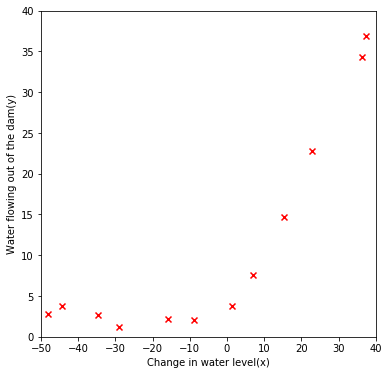

In [4]:
plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X, y, marker = "x", color = "red")
plt.xlim((-50, 40))
plt.ylim((0, 40))
plt.xlabel("Change in water level(x)")
plt.ylabel("Water flowing out of the dam(y)")

Regularized linear regression cost function

In [5]:
theta = np.array((1, 1))

np.shape(np.mat(X))

(12, 1)

In [6]:
def costFunctionReg(X, y, theta, lambda1):
    one = np.transpose(np.mat(np.ones(len(X))))
    X_mat = np.hstack((one, X))
    theta_mat = np.transpose(np.mat(theta))
    H_x = X_mat * theta_mat
    y_mat = np.mat(y)
    
    J_theta = 1/(2*m) * sum(np.power(H_x - y_mat, 2)) + lambda1/(2*m) * sum(np.power(theta_mat, 2))
    
    
    return J_theta[0, 0]

In [7]:
costFunctionReg(X, y, theta, 0)

303.9515255535976

Regularized linear regression gradient

In [8]:
lambda1 = 0
X_train = X
y_train = y

def costFunctionReg(theta):
    one = np.transpose(np.mat(np.ones(len(X_train))))
    X_train_mat = np.hstack((one, X_train))
    theta_mat = np.transpose(np.mat(theta))
    H_x = X_train_mat * theta_mat
    y_train_mat = np.mat(y_train)
    
    J_theta = 1/(2*m) * sum(np.power(H_x - y_train_mat, 2)) + lambda1/(2*m) * sum(np.power(theta_mat, 2))
    
    G_theta = np.zeros(len(theta_mat))
    
    G_theta0 = 1/m * sum(H_x - y_train_mat)
    G_theta1 = 1/m * sum(np.multiply(H_x - y_train_mat, X_train_mat[:, 1])) + lambda1/m * theta_mat[1, :] 
    
    G_theta[0] = G_theta0
    G_theta[1] = G_theta1
  
    
    return J_theta[0, 0]

In [9]:
costFunctionReg(theta)

303.9515255535976

Fitting linear regression

In [10]:
lambda1 = 0
X_train = X
y_train = y

def gradientDesc(theta):
    one = np.transpose(np.mat(np.ones(len(X_train))))
    X_train_mat = np.hstack((one, X_train))
    theta_mat = np.transpose(np.mat(theta))
    H_x = X_train_mat * theta_mat
    y_train_mat = np.mat(y_train)
    
    J_theta = 1/(2*m) * sum(np.power(H_x - y_train_mat, 2)) + lambda1/(2*m) * sum(np.power(theta_mat, 2))
    
    G_theta = np.zeros(len(theta_mat))
    
    G_theta0 = 1/m * sum(H_x - y_train_mat)
    G_theta1 = 1/m * sum(np.multiply(H_x - y_train_mat, X_train_mat[:, 1])) + lambda1/m * theta_mat[1, :] 
    
    G_theta[0] = G_theta0
    G_theta[1] = G_theta1
  
    
    return G_theta

In [11]:
gradientDesc(theta)

array([-15.30301567, 598.16741084])

In [12]:
theta_optimum = fmin_bfgs(costFunctionReg, theta, gradientDesc)

theta_optimum

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


array([13.08790353,  0.36777923])

Text(0,0.5,u'Water flowing out of the dam (y)')

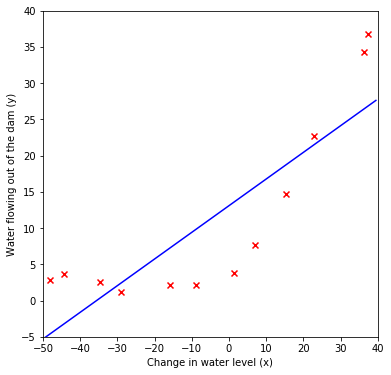

In [13]:
X_plot = np.arange(-50, 40, 0.5)

one = np.transpose(np.mat(np.ones(len(X_plot))))
y_plot = np.hstack((one, np.transpose(np.mat(X_plot)))) * np.transpose(np.mat(theta_optimum))

plt.figure(num = 1, figsize = (6, 6))
plt.scatter(X, y, marker = "x", color = "red")
plt.plot(X_plot, y_plot, color = "blue")
plt.xlim((-50, 40))
plt.ylim((-5, 40))
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")


# 2. Bias-variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex for the data and tend to underfit, while models with high variance overfit to the training data.

Learning curves

A learning curve plots training and cross validation error as a function of training set size.

In [14]:
lambda1 = 0

def learningCurve(theta):
    error_train = np.zeros(m)
    error_val = np.zeros(m)

    Xval_mat = np.mat(Xval)
    yval_mat = np.mat(yval)
    
    for i in range(1, m, 1):
        X_train = X[:i]
        y_train = y[:i]
        
        def costFunctionReg(theta):
            one = np.transpose(np.mat(np.ones(len(X_train))))
            X_train_mat = np.hstack((one, X_train))
            theta_mat = np.transpose(np.mat(theta))
            H_x = X_train_mat * theta_mat
            y_train_mat = np.mat(y_train)
    
            J_theta = 1/(2*i) * sum(np.power(H_x - y_train_mat, 2)) + lambda1/(2*i) * sum(np.power(theta_mat, 2))
  
            return J_theta[0, 0]


        def gradientDesc(theta):
            one = np.transpose(np.mat(np.ones(len(X_train))))
            X_train_mat = np.hstack((one, X_train))
            theta_mat = np.transpose(np.mat(theta))
            H_x = X_train_mat * theta_mat
            y_train_mat = np.mat(y_train)
    
            J_theta = 1/(2*i) * sum(np.power(H_x - y_train_mat, 2)) + lambda1/(2*i) * sum(np.power(theta_mat, 2))
    
            G_theta = np.zeros(len(theta_mat))
    
            G_theta0 = 1/m * sum(H_x - y_train_mat)
            G_theta1 = 1/m * sum(np.multiply(H_x - y_train_mat, X_train_mat[:, 1])) + lambda1/m * theta_mat[1, :] 
    
            G_theta[0] = G_theta0
            G_theta[1] = G_theta1
  
            return G_theta


        theta_optimum = fmin_cg(costFunctionReg, theta, gradientDesc)
    
        def predict(theta_optimum):
            one = np.transpose(np.mat(np.ones(len(X_train))))
            X_train_mat = np.hstack((one, X_train))
            theta_mat = np.transpose(np.mat(theta_optimum))
            y_predict = X_train_mat * theta_mat
            J_training = 1/(2*m) * sum(np.power(y_predict - y_train, 2))
        
            one_val = np.transpose(np.mat(np.ones(len(Xval))))
            X_val_mat = np.hstack((one_val, Xval_mat))
            y_val_predict = X_val_mat * theta_mat
            J_validation = 1/(2*m) * sum(np.power(y_val_predict - yval_mat, 2))
    
            return (J_training[0, 0], J_validation[0, 0])
    
    
        error_train[i-1] = predict(theta_optimum)[0]
        error_val[i-1] = predict(theta_optimum)[1]
    
    
    return error_train, error_val

In [15]:
theta = np.array((0, 0))

error_train, error_val = learningCurve(theta)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 23
         Gradient evaluations: 23
         Current function value: 1.482953
         Iterations: 0
         Function evaluations: 26
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 20
         Function evaluations: 269
         Gradient evaluations: 264
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 16
         Function evaluations: 102
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 44
         Function evaluations: 244
         Gradient evaluations: 244
Opt

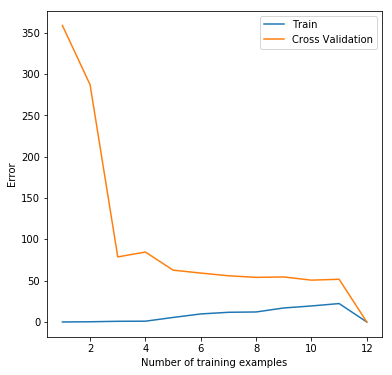

In [16]:
plt.figure(num = 1, figsize = (6, 6))
X_plot = np.arange(1, m+1)

plt.plot(X_plot, error_train, X_plot, error_val)
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend(labels = ["Train", "Cross Validation"])

# 3. Polynomial Regression

We obtain a linear regression model where the features are the various powers of the original value.

In [17]:
def polyFeatures(X, p):
    
    X_poly_mat = np.mat(np.zeros((len(X), p)))
    X_mat = np.mat(X)
    
    for i in range(1, p+1, 1):
        X_poly_mat[:, i-1] = np.power(X_mat[:, 0], i)
    
    
    return X_poly_mat

In [18]:
def norm(X, p):
    X_poly_mat_norm = np.mat(np.zeros((len(X), p)))
    X_poly_mat = np.mat(X)
    
    for i in range(0, p, 1):
        mean = np.mean(X_poly_mat[:, i])
        std = np.std(X_poly_mat[:, i])
        X_poly_mat_norm[:, i] = (X_poly_mat[:, i] - mean) / std
        
        
    return X_poly_mat_norm

In [19]:
X_train_poly_mat = polyFeatures(X_train, 8)
X_train_poly_mat_norm = norm(X_train_poly_mat, 8)

one_train = np.transpose(np.mat(np.zeros(m)))
X_train_poly_mat_norm = np.hstack((one_train, X_train_poly_mat_norm))



X_test_poly_mat = polyFeatures(Xtest, 8)
X_test_poly_mat_norm = norm(X_test_poly_mat, 8)

one_test = np.transpose(np.mat(np.zeros(len(Xtest))))
X_test_poly_mat_norm = np.hstack((one_test, X_test_poly_mat_norm))



X_val_poly_mat = polyFeatures(Xval, 8)
X_val_poly_mat_norm = norm(X_val_poly_mat, 8)

one_val = np.transpose(np.mat(np.zeros(len(Xval))))
X_val_poly_mat_norm = np.hstack((one_val, X_val_poly_mat_norm))


In [20]:
lambda1 = 0

def costFunctionReg(theta):
    one = np.transpose(np.mat(np.ones(len(X_train_poly_mat))))
    X_train_mat = np.hstack((one, X_train_poly_mat))
    theta_mat = np.transpose(np.mat(theta))
    H_x = X_train_mat * theta_mat
    y_train_mat = np.mat(y)
    
    J_theta = 1/(2*m) * sum(np.power(H_x - y_train_mat, 2)) + lambda1/(2*m) * sum(np.power(theta_mat, 2))
    
    G_theta = np.zeros(len(theta_mat))
    
    G_theta0 = 1/m * sum(H_x - y_train_mat)
    G_theta1 = 1/m * sum(np.multiply(H_x - y_train_mat, X_train_mat[:, 1])) + lambda1/m * theta_mat[1, :] 
    
    G_theta[0] = G_theta0
    G_theta[1] = G_theta1
  
    
    return J_theta[0, 0]



def gradientDesc(theta):
    one = np.transpose(np.mat(np.ones(len(X_train_poly_mat))))
    X_train_mat = np.hstack((one, X_train_poly_mat))
    theta_mat = np.transpose(np.mat(theta))
    H_x = X_train_mat * theta_mat
    y_train_mat = np.mat(y)
    
    J_theta = 1/(2*m) * sum(np.power(H_x - y_train_mat, 2)) + lambda1/(2*m) * sum(np.power(theta_mat, 2))
    
    G_theta = np.zeros(len(theta_mat))
    
    G_theta0 = 1/m * sum(H_x - y_train_mat)
    G_theta1 = 1/m * sum(np.multiply(H_x - y_train_mat, X_train_mat[:, 1])) + lambda1/m * theta_mat[1, :] 
    
    G_theta[0] = G_theta0
    G_theta[1] = G_theta1
  
    
    return G_theta

In [21]:
theta = np.zeros(np.shape(X_train_poly_mat)[1] + 1)

gradientDesc(theta)

array([ -11.21758933, -245.65199649,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ])

In [22]:
theta_optimum = fmin_bfgs(costFunctionReg, theta, gradientDesc)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


In [23]:
theta_optimum

array([13.08790351,  0.36777923,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])